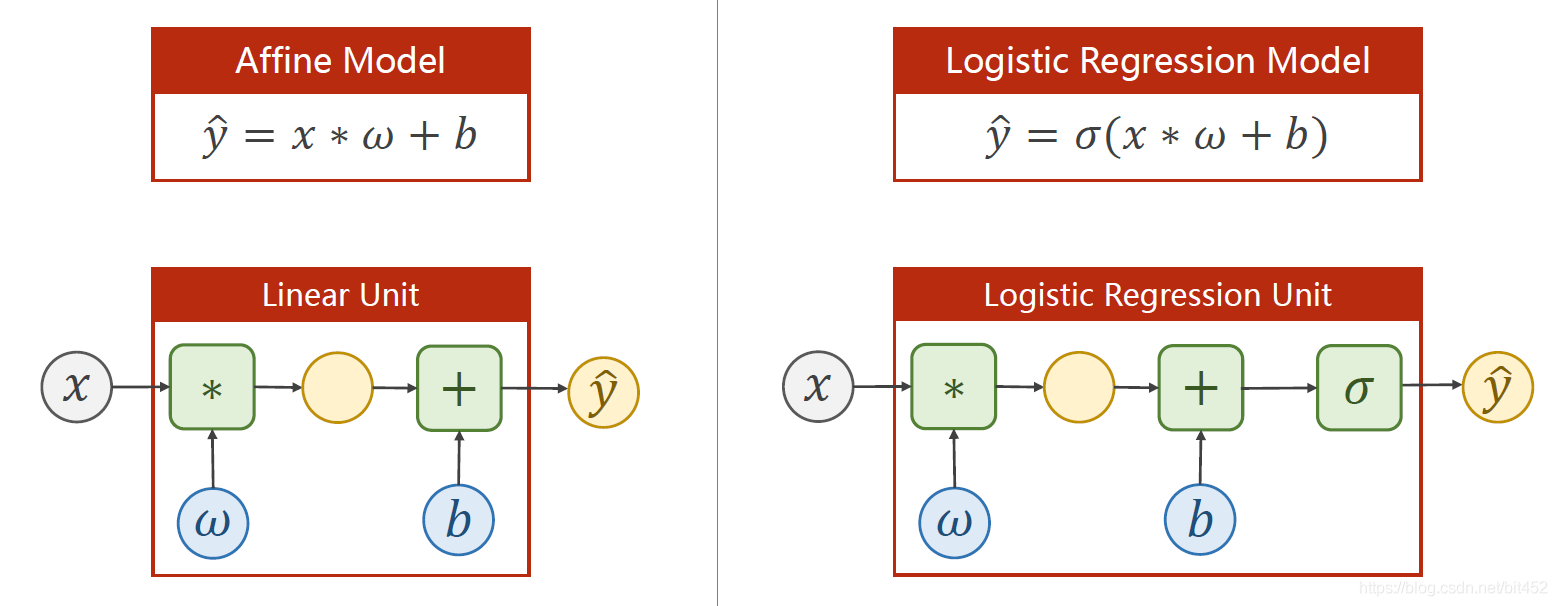
1、 逻辑斯蒂回归和线性模型的明显区别是在线性模型的后面，添加了激活函数(非线性变换)

2、分布的差异：KL散度，cross-entropy交叉熵

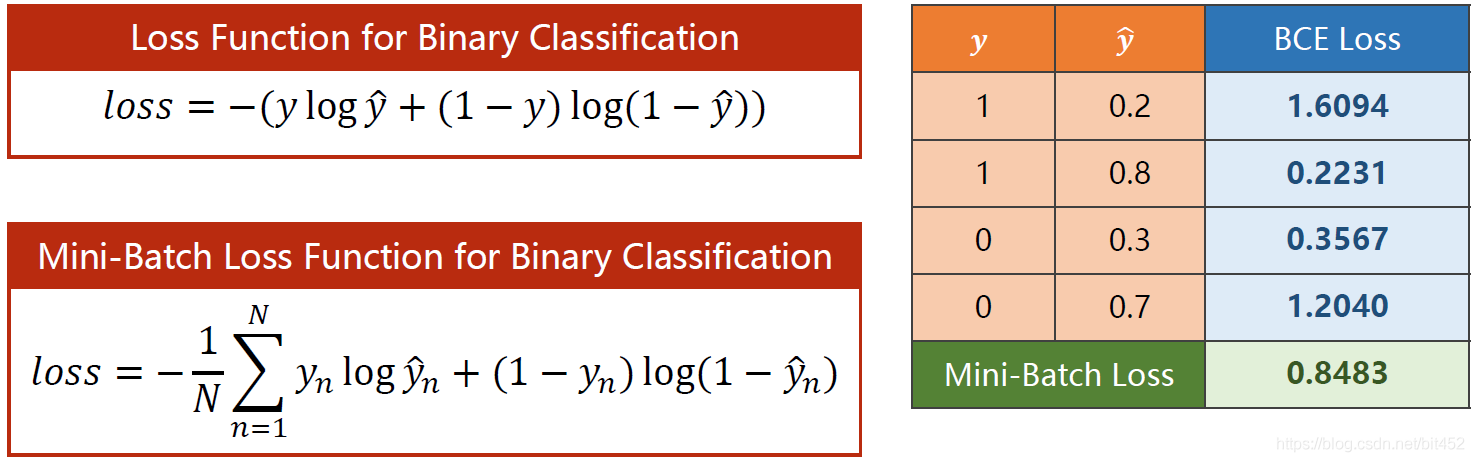

说明：预测与标签越接近，BCE损失越小。

视频中代码F.sigmoid(self.linear(x))会引发warning，此处更改为torch.sigmoid(self.linear(x))

参考[torch.sigmoid()、torch.nn.Sigmoid()和torch.nn.functional.sigmoid()三者之间的区别](https://blog.csdn.net/weixin_42621901/article/details/107664771)

2、BCELoss - Binary CrossEntropyLoss 

BCELoss 是CrossEntropyLoss的一个特例，只用于二分类问题，而CrossEntropyLoss可以用于二分类，也可以用于多分类。

如果是二分类问题，建议BCELoss

In [1]:
pip list

Package                       Version
----------------------------- ----------------------
absl-py                       1.3.0
addict                        2.4.0
aiohttp                       3.8.3
aiosignal                     1.3.1
alabaster                     0.7.12
albumentations                1.3.0
aliyun-python-sdk-core        2.13.36
aliyun-python-sdk-kms         2.16.0
antlr4-python3-runtime        4.8
anyio                         3.6.2
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
astor                         0.8.1
async-timeout                 4.0.2
asynctest                     0.13.0
attrs                         22.1.0
audioread                     3.0.0
autopep8                      2.0.0
av                            10.0.0
Babel                         2.11.0
backcall                      0.2.0
beautifulsoup4                4.11.1
bitarray                      2.6.0
bleach                        5.0.1


0 1.9718049764633179
1 1.962585687637329
2 1.9539167881011963
3 1.9457621574401855
4 1.9380874633789062
5 1.9308596849441528
6 1.9240485429763794
7 1.9176249504089355
8 1.9115617275238037
9 1.9058330059051514
10 1.9004151821136475
11 1.8952858448028564
12 1.8904237747192383
13 1.8858096599578857
14 1.8814250230789185
15 1.8772532939910889
16 1.8732779026031494
17 1.8694849014282227
18 1.8658603429794312
19 1.862391710281372
20 1.8590670824050903
21 1.8558754920959473
22 1.8528070449829102
23 1.8498520851135254
24 1.8470027446746826
25 1.8442500829696655
26 1.8415870666503906
27 1.8390073776245117
28 1.8365038633346558
29 1.834071397781372
30 1.8317043781280518
31 1.829397439956665
32 1.8271465301513672
33 1.8249471187591553
34 1.822796106338501
35 1.8206884860992432
36 1.818622350692749
37 1.8165937662124634
38 1.8146003484725952
39 1.8126392364501953
40 1.8107082843780518
41 1.8088054656982422
42 1.8069281578063965
43 1.80507493019104
44 1.8032442331314087
45 1.8014342784881592
46 1.7

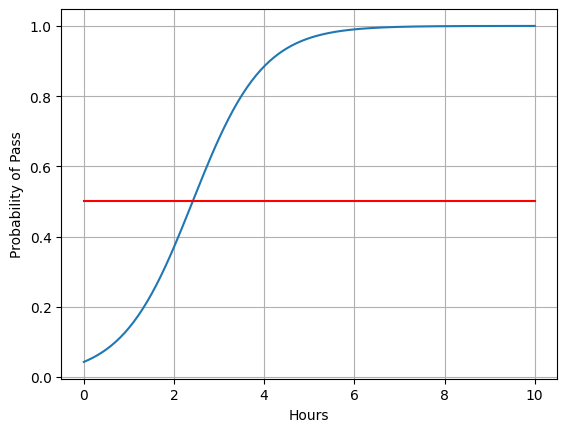

In [12]:
import torch
# import torch.nn.functional as F
 
# prepare dataset
x_data = torch.Tensor([[1.0], [2.0], [3.0]])
y_data = torch.Tensor([[0], [0], [1]])
 
#design model using class
class LogisticRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(1,1)
 
    def forward(self, x):
        # y_pred = F.sigmoid(self.linear(x))
        y_pred = torch.sigmoid(self.linear(x))   # 在线性模型的基础上进行Logistic变换，转为0-1的概率
        return y_pred
model = LogisticRegressionModel()
 
# construct loss and optimizer
# 默认情况下，loss会基于element平均，如果size_average=False的话，loss会被累加。
# criterion = torch.nn.BCELoss(size_average = False) 
criterion = torch.nn.BCELoss(reduction='sum')   # 双分类交叉熵计算loss
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

# training cycle forward, backward, update
for epoch in range(1000):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    print(epoch, loss.item())
 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print('w = ', model.linear.weight.item())
print('b = ', model.linear.bias.item())

x_test = torch.Tensor([[4.0]])
y_test = model(x_test)
print('y_pred = ', y_test.data)


# 进行验证
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0,10,200)
x_t = torch.Tensor(x).view((200,1)) #一维特征需要变换
y_t = model(x_t)
y = y_t.data.numpy()
plt.plot(x,y)
plt.plot([0,10],[0.5,0.5],c='r')   # 50%概率的分割线
plt.xlabel('Hours')
plt.ylabel('Probability of Pass')
plt.grid()
plt.show()

In [13]:
# 关于BCE loss写了几行代码，帮助理解。
import math
import torch
pred = torch.tensor([[-0.2],[0.2],[0.8]])
target = torch.tensor([[0.0],[0.0],[1.0]])
 
sigmoid = torch.nn.Sigmoid()
pred_s = sigmoid(pred)
print(pred_s)
"""
pred_s 输出tensor([[0.4502],[0.5498],[0.6900]])
0*math.log(0.4502)+1*math.log(1-0.4502)
0*math.log(0.5498)+1*math.log(1-0.5498)
1*math.log(0.6900) + 0*log(1-0.6900)
"""

# 通过手动计算和使用pytorch给的方法计算进行对比
result = 0
i=0
for label in target:
    if label.item() == 0:
        result +=  math.log(1-pred_s[i].item())
    else:
        result += math.log(pred_s[i].item())
    i+=1
result /= 3
print("bce：", -result)
loss = torch.nn.BCELoss()
print('BCELoss:',loss(pred_s,target).item())

tensor([[0.4502],
        [0.5498],
        [0.6900]])
bce： 0.5891261081856343
BCELoss: 0.5891261100769043
